# Analyzing & Visualizing Data


* Visualizing users and reviews.

* Analyzing the structures of data and extracting important information.

# Importing

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime,timedelta

In [2]:
# Plotting import
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.ticker import MaxNLocator


import seaborn as sns
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

## Importing Data

In [3]:
# This is Electronics dataset
electronics_data=pd.read_csv("ratings.csv", dtype={'rating': 'int8'},
                             names=['userId', 'productId','rating','timestamp'], index_col=None, header=0)
#electronics_data.drop("timestamp",axis=1, inplace=True)
electronics_data.head()

,userId,productId,rating,timestamp
0,A2CX7LUOHB2NDG,0321732944,5,1341100800
1,A2NWSAGRHCP8N5,0439886341,1,1367193600
2,A2WNBOD3WNDNKT,0439886341,3,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1,1334707200
4,A1QGNMC6O1VW39,0511189877,5,1397433600


# Analyzing Data

In [4]:
printmd("**Number of Rating**: {:,}".format(electronics_data.shape[0]) )
printmd("**Columns**: {}".format( np.array2string(electronics_data.columns.values)) )
printmd("**Number of Users**: {:,}".format(len(electronics_data.userId.unique()) ) )
printmd("**Number of Products**: {:,}".format(len(electronics_data.productId.unique())  ) )

**Number of Rating**: 1,048,575

**Columns**: ['userId' 'productId' 'rating' 'timestamp']

**Number of Users**: 786,329

**Number of Products**: 61,893

In [5]:
electronics_data.describe()['rating'].reset_index()

,index,rating
0,count,1.048575e+06
1,mean,3.973379e+00
2,std,1.399329e+00
3,min,1.000000e+00
4,25%,3.000000e+00
5,50%,5.000000e+00
6,75%,5.000000e+00
7,max,5.000000e+00


**There is no rating below 1** because the minimum rating is 1.

In [6]:
#Check for missing values
printmd('**Number of missing values**:')
pd.DataFrame(electronics_data.isnull().sum().reset_index()).rename( columns={0:"Total missing","index":"Columns"}) 

**Number of missing values**:

,Columns,Total missing
0,userId,0
1,productId,0
2,rating,0
3,timestamp,0


<h3 style="color:red" >It's good that there is no missing data</h2>

In [7]:
data_by_date = electronics_data.copy()
data_by_date.timestamp = pd.to_datetime(electronics_data.timestamp, unit="s")#.dt.date
data_by_date = data_by_date.sort_values(by="timestamp", ascending=False).reset_index(drop=True)
printmd("**Number of Ratings each day:**")
data_by_date.groupby("timestamp")["rating"].count().tail(10).reset_index()

**Number of Ratings each day:**

,timestamp,rating
0,2014-07-14,305
1,2014-07-15,224
2,2014-07-16,209
3,2014-07-17,76
4,2014-07-18,91
5,2014-07-19,74
6,2014-07-20,76
7,2014-07-21,103
8,2014-07-22,97
9,2014-07-23,11


## Rating vs Product

In [8]:
#rating_by_product = electronics_data.groupby(by='productId')['Rating'].count().sort_values(ascending=False).reset_index()
rating_by_product = electronics_data.groupby("productId").agg({"userId":"count","rating":"mean"}).rename(
                        columns={"userId":"Number of Ratings", "rating":"Average Rating"}).reset_index()

In [9]:
printmd("**Top 10 products by Number of Rating**")
rating_by_product.sort_values(by="Number of Ratings",ascending=False ).reset_index(drop=True).head(10)

**Top 10 products by Number of Rating**

,productId,Number of Ratings,Average Rating
0,B0002L5R78,9487,4.448614
1,B0001FTVEK,5345,4.007109
2,B000I68BD4,4903,3.501530
3,B000BQ7GW8,4275,4.553216
4,B00007E7JU,3523,4.565995
5,B000BKJZ9Q,3219,4.440509
6,B000B9RI14,2996,4.775701
7,B000A6PPOK,2828,3.950495
8,B00007M1TZ,2608,3.976610
9,B00004ZCJE,2547,4.123675


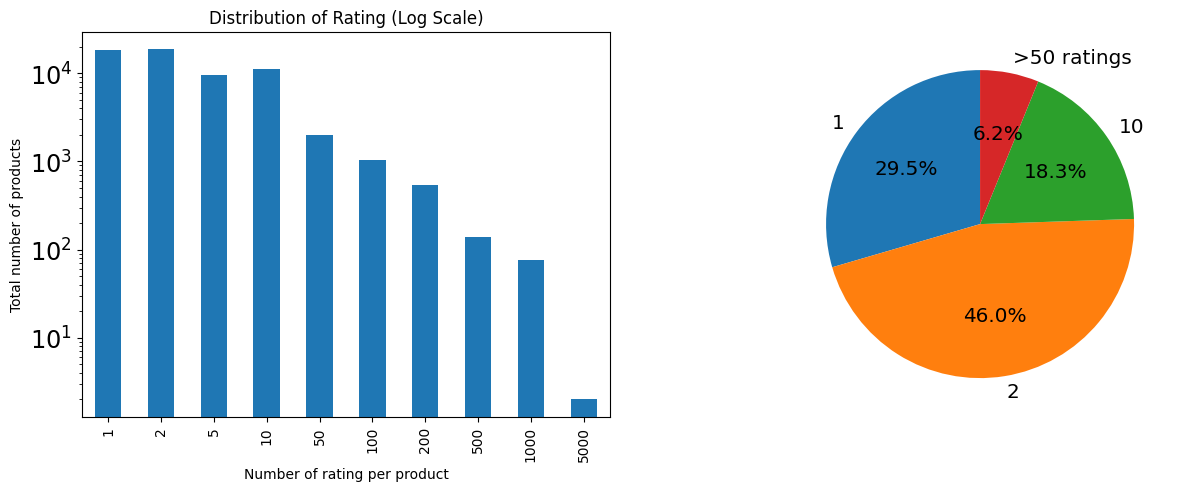

In [10]:
rating_hist,  bins  = np.histogram(rating_by_product["Number of Ratings"], bins=[1,2,5,10,50,100,200,500,1000,5000,10000])
rating_hist2, bins2 = np.histogram(rating_by_product["Number of Ratings"], bins=[1,2,10,50,100000])


figsize = (15,5)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=figsize)

pd.DataFrame({"Numbers of Products":rating_hist,"Total Rates":bins[:-1]}).plot.bar(x="Total Rates", ax=ax1)
ax1.set(yscale="log")
ax1.set(ylabel="Total number of products", xlabel="Number of rating per product")
ax1.set(title="Distribution of Rating (Log Scale)")
ax1.get_legend().remove()
[item.set_fontsize("xx-large") for item in ax1.get_yticklabels()]

pd.DataFrame({"Numbers of User":rating_hist2,"Total Rates":bins2[:-1]}).plot.pie(x="Total Rates",y="Numbers of User",
              labels=[1,2,10,">50 ratings"], ax=ax2,legend=False, autopct='%1.1f%%', startangle=90, fontsize="x-large")
ax2.set_ylabel('')

plt.show()

<h3 style="color:red" >Only 5.5% of products rated by more than 50 people</h3>

## Products by Average Rating

In [11]:
# Define Cutoff is the value where the products is counted when its number of ratings is greater than.
# product with less than cutoff number of ratings will be neglected
cutoff = 50
top_rated = rating_by_product.loc[rating_by_product["Number of Ratings"]>cutoff].sort_values(
                                by="Average Rating",ascending=False).reset_index(drop=True)

In [12]:
printmd("**Top 5 Products have the highest Ratings**")
top_rated.head(5)

**Top 5 Products have the highest Ratings**

,productId,Number of Ratings,Average Rating
0,B0000DYV9H,76,4.947368
1,B000053HC5,166,4.945783
2,B00009R96C,105,4.885714
3,B00005LE76,58,4.879310
4,B000I1X3W8,253,4.869565


In [13]:
printmd("**With cutoff = {} we have only {:,} products.**".format(cutoff,top_rated.shape[0] ))
top_rated.describe()

**With cutoff = 50 we have only 3,741 products.**

,Number of Ratings,Average Rating
count,3741.000000,3741.000000
mean,180.258487,3.970762
std,321.810754,0.557438
min,51.000000,1.203704
25%,66.000000,3.666667
50%,96.000000,4.075000
75%,170.000000,4.397032
max,9487.000000,4.947368


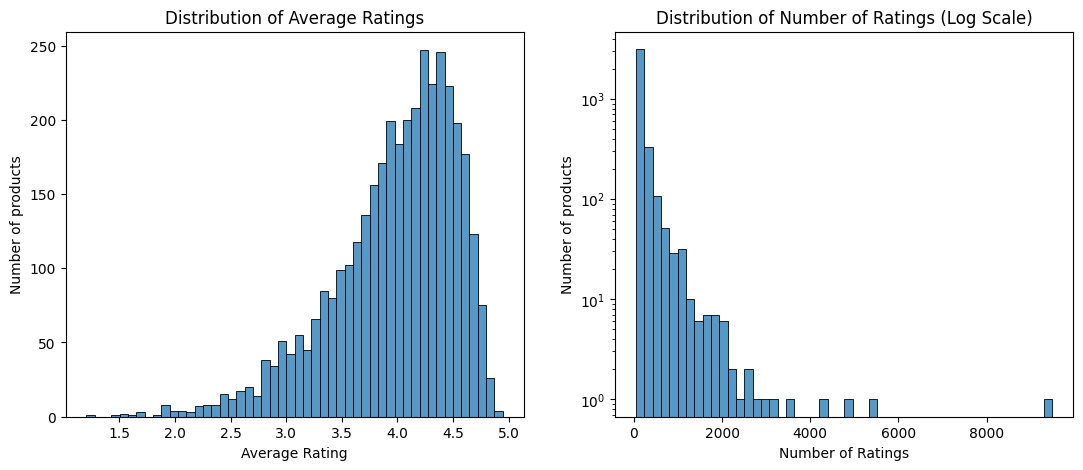

In [14]:
figsize = (13,5)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=figsize)
sns.histplot(data=top_rated["Average Rating"], bins=50, ax=ax1)
ax1.set(title="Distribution of Average Ratings", ylabel="Number of products")

sns.histplot(data=top_rated["Number of Ratings"], bins=50, ax=ax2)
ax2.set(title="Distribution of Number of Ratings (Log Scale)")
ax2.set(yscale="log", ylabel="Number of products")
plt.show();


**Joint Graph**

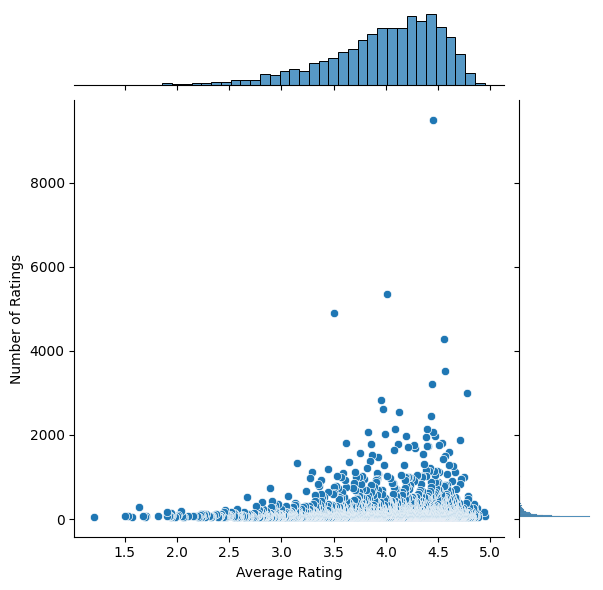

In [15]:
printmd("**Joint Graph**")
sns.jointplot(x='Average Rating', y='Number of Ratings', data=top_rated);

## Recently Polular Items

### Top products rated during period of 30 days

In [16]:
begin_date     = data_by_date.timestamp[0] - timedelta(days=30)
data_by_date30 = data_by_date.loc[ data_by_date.timestamp > begin_date  ]
products_30days= data_by_date30.groupby(["productId"]).agg({"rating":["mean","count"]}).droplevel(axis=1,level=0).reset_index()

<h3 style="color:red" >List of top products by number of rating </h3>

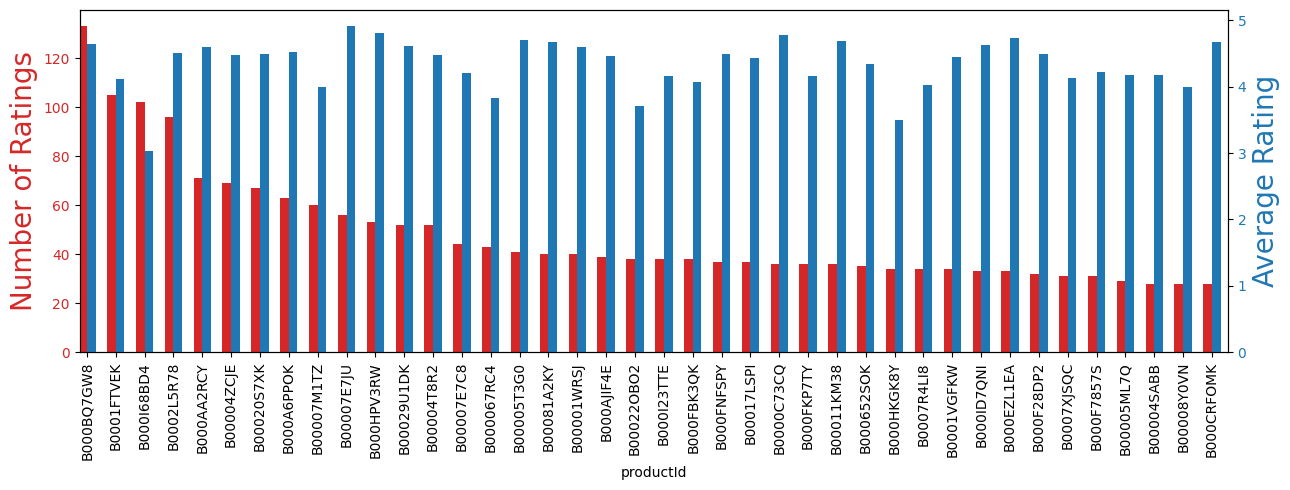

In [17]:
top_rated = products_30days.sort_values(by="count", ascending=False).head(40)

printmd('<h3 style="color:red" >List of top products by number of rating </h3>')
figsize = (13,5)
fig0, ax1 = plt.subplots(figsize=figsize)
ax2 = ax1.twinx()
top_rated.plot(kind = "bar",x="productId", y="count", 
                        ax=ax1,align='edge', color="tab:red", width=-0.3, legend=False)
top_rated.plot(kind = "bar",x="productId", y="mean", 
                        ax=ax2, align='edge',color="tab:blue", width=0.3, legend=False)
############# Style Set up ###############
ax1.set_ylabel('Number of Ratings', color="tab:red", fontsize=20)
ax1.tick_params(axis='y', labelcolor="tab:red")
ax2.set_ylabel('Average Rating', color="tab:blue", fontsize=20)
ax2.tick_params(axis='y', labelcolor="tab:blue")

plt.tight_layout()
plt.show()

<h3 style="color:red" >List of top products by Average Rating </h3>

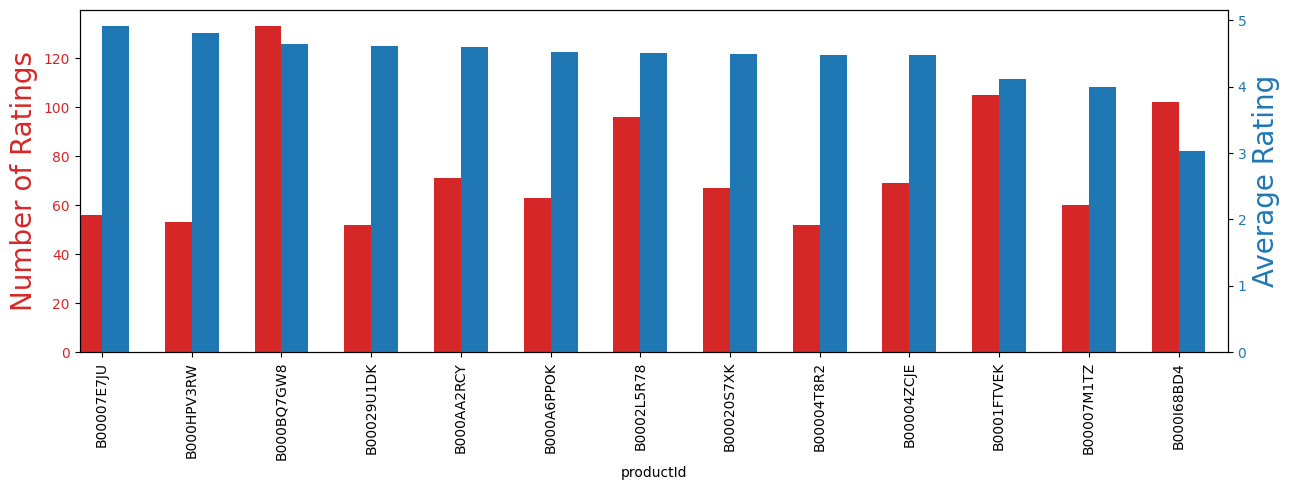

In [18]:
top_rated = products_30days.loc[products_30days["count"] > 50].sort_values(by="mean", ascending=False).head(40)

printmd('<h3 style="color:red" >List of top products by Average Rating </h3>')
figsize = (13,5)
fig0, ax1 = plt.subplots(figsize=figsize)
ax2 = ax1.twinx()
top_rated.plot(kind = "bar",x="productId", y="count", 
                        ax=ax1,align='edge', color="tab:red", width=-0.3, legend=False)
top_rated.plot(kind = "bar",x="productId", y="mean", 
                        ax=ax2, align='edge',color="tab:blue", width=0.3, legend=False)
############# Style Set up ###############
ax1.set_ylabel('Number of Ratings', color="tab:red", fontsize=20)
ax1.tick_params(axis='y', labelcolor="tab:red")
ax2.set_ylabel('Average Rating', color="tab:blue", fontsize=20)  
ax2.tick_params(axis='y', labelcolor="tab:blue")

plt.tight_layout()
plt.show()

# TensorFlow Recommenders

TensorFlow Recommenders (TFRS) is a library for building recommender system models.

It helps with the full workflow of building a recommender system: data preparation, model formulation, training, evaluation, and deployment. It's built on Keras and aims to have a gentle learning curve while still giving you the flexibility to build complex models. TFRS is open source and available on [Github](https://github.com/tensorflow/recommenders).

TFRS makes it possible to:

* Build and evaluate flexible recommendation retrieval models.
* Freely incorporate item, user, and context information into recommendation models.
* Train multi-task models that jointly optimize multiple recommendation objectives.

In [19]:

!pip install -q tensorflow-recommenders

In [20]:
import numpy as np
import tensorflow as tf
import tensorflow_recommenders as tfrs
# Build a model.
class RankingModel(tf.keras.Model):

    def __init__(self):
        super().__init__()
        embedding_dimension = 32

        self.user_embeddings = tf.keras.Sequential([
                                    tf.keras.layers.experimental.preprocessing.StringLookup(
                                        vocabulary=unique_userIds, mask_token=None),
                                        # add addional embedding to account for unknow tokens
                                    tf.keras.layers.Embedding(len(unique_userIds)+1, embedding_dimension)
                                    ])

        self.product_embeddings = tf.keras.Sequential([
                                    tf.keras.layers.experimental.preprocessing.StringLookup(
                                        vocabulary=unique_productIds, mask_token=None),
                                    # add addional embedding to account for unknow tokens
                                    tf.keras.layers.Embedding(len(unique_productIds)+1, embedding_dimension)
                                    ])
        # Set up a retrieval task and evaluation metrics over the
        # entire dataset of candidates.
        self.ratings = tf.keras.Sequential([
                            tf.keras.layers.Dense(256, activation="relu"),
                            tf.keras.layers.Dense(64,  activation="relu"),
                            tf.keras.layers.Dense(1)
                              ])
    def call(self, userId, productId):
        user_embeddings  = self.user_embeddings (userId)
        product_embeddings = self.product_embeddings(productId)
        return self.ratings(tf.concat([user_embeddings,product_embeddings], axis=1))

# Build a model.
class amazonModel(tfrs.models.Model):

    def __init__(self):
        super().__init__()
        self.ranking_model: tf.keras.Model = RankingModel()
        self.task: tf.keras.layers.Layer   = tfrs.tasks.Ranking(
                                                    loss    =  tf.keras.losses.MeanSquaredError(),
                                                    metrics = [tf.keras.metrics.RootMeanSquaredError()])
            

    def compute_loss(self, features, training=False):
        rating_predictions = self.ranking_model(features["userId"], features["productId"]  )

        return self.task( labels=features["rating"], predictions=rating_predictions)

In [21]:
data_by_date['year'] = data_by_date['timestamp'].dt.year
data_by_date['month'] = data_by_date['timestamp'].dt.month
data_by_date['day'] = data_by_date['timestamp'].dt.day

In [22]:
cutoff_no_rat = 50    ## Only count products which received more than or equal 50
cutoff_year   = 2011  ## Only count Rating after 2011
recent_data   = data_by_date.loc[data_by_date["year"] > cutoff_year]
print("Number of Rating: {:,}".format(recent_data.shape[0]) )
print("Number of Users: {:,}".format(len(recent_data.userId.unique()) ) )
print("Number of Products: {:,}".format(len(recent_data.productId.unique())  ) )
del data_by_date  ### Free up memory ###
recent_prod   = recent_data.loc[recent_data.groupby("productId")["rating"].transform('count').ge(cutoff_no_rat)].reset_index(
                    drop=True).drop(["timestamp","year","month"],axis=1)
del recent_data  ### Free up memory ###

Number of Rating: 343,581
Number of Users: 288,669
Number of Products: 28,357


In [23]:
userIds    = recent_prod.userId.unique()
productIds = recent_prod.productId.unique()
total_ratings= len(recent_prod.index)

In [24]:
ratings = tf.data.Dataset.from_tensor_slices( {"userId":tf.cast( recent_prod.userId.values  ,tf.string),
                                "productId":tf.cast( recent_prod.productId.values,tf.string),
                                "rating":tf.cast( recent_prod.rating.values  ,tf.int8,) } )

In [25]:
tf.random.set_seed(42)
shuffled = ratings.shuffle(100_000, seed=42, reshuffle_each_iteration=False)

train = shuffled.take( int(total_ratings*0.8) )
test = shuffled.skip(int(total_ratings*0.8)).take(int(total_ratings*0.2))

unique_productIds = productIds
unique_userIds    = userIds

In [26]:
model = amazonModel()
model.compile(optimizer=tf.keras.optimizers.Adagrad( learning_rate=0.1 ))
cached_train = train.shuffle(100_000).batch(8192).cache()
cached_test = test.batch(4096).cache()
model.fit(cached_train, epochs=10)

Epoch 1/10
22/22 [==============================] - 3s 47ms/step - root_mean_squared_error: 1.9629 - loss: 3.7092 - regularization_loss: 0.0000e+00 - total_loss: 3.7092
Epoch 2/10
22/22 [==============================] - 0s 18ms/step - root_mean_squared_error: 1.2746 - loss: 1.6279 - regularization_loss: 0.0000e+00 - total_loss: 1.6279
Epoch 3/10
22/22 [==============================] - 0s 18ms/step - root_mean_squared_error: 1.2549 - loss: 1.5794 - regularization_loss: 0.0000e+00 - total_loss: 1.5794
Epoch 4/10
22/22 [==============================] - 0s 18ms/step - root_mean_squared_error: 1.2422 - loss: 1.5480 - regularization_loss: 0.0000e+00 - total_loss: 1.5480
Epoch 5/10
22/22 [==============================] - 0s 19ms/step - root_mean_squared_error: 1.2334 - loss: 1.5267 - regularization_loss: 0.0000e+00 - total_loss: 1.5267
Epoch 6/10
22/22 [==============================] - 0s 18ms/step - root_mean_squared_error: 1.2299 - loss: 1.5182 - regularization_loss: 0.0000e+00 - total

In [27]:
# Evaluate.
model.evaluate(cached_test, return_dict=True)

11/11 [==============================] - 1s 21ms/step - root_mean_squared_error: 1.2379 - loss: 1.5273 - regularization_loss: 0.0000e+00 - total_loss: 1.5273


{'root_mean_squared_error': 1.2378748655319214,
 'loss': 1.4853811264038086,
 'regularization_loss': 0,
 'total_loss': 1.4853811264038086}

In [28]:
user_rand = userIds[124]
test_rating = {}
for m in test.take(5):
    test_rating[m["productId"].numpy()]=RankingModel()(tf.convert_to_tensor([user_rand]),tf.convert_to_tensor([m["productId"]]))

In [29]:
print("Top 5 recommended products for User {}: ".format(user_rand))
for m in sorted(test_rating, key=test_rating.get, reverse=True):
    print(m.decode())

Top 5 recommended products for User AQFVZGKFBOUK1: 
B0002ZDIKW
B000067RC1
B0003NN83K
B0007XJSQC
B0009VU7RG
